## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.189902 -0.040533  0.406484 -1.340982  1.202722 -0.131878
1  0.341794  0.804715 -0.057216 -0.177768  0.636236  0.736671
2 -1.213464 -0.786784 -1.042410 -0.444990  1.231074 -0.688362
3 -1.206296  0.329324  1.524224  0.040935 -1.442998 -0.754503
4  1.084172 -0.113328 -1.166507  0.862763  1.273757  1.902936


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9135411	total: 69.6ms	remaining: 1m 9s
1:	learn: 0.9055620	total: 70.2ms	remaining: 35s
2:	learn: 0.8977592	total: 70.9ms	remaining: 23.6s
3:	learn: 0.8890397	total: 71.6ms	remaining: 17.8s
4:	learn: 0.8828051	total: 72.2ms	remaining: 14.4s
5:	learn: 0.8749099	total: 72.8ms	remaining: 12.1s
6:	learn: 0.8669973	total: 73.2ms	remaining: 10.4s
7:	learn: 0.8591057	total: 73.8ms	remaining: 9.15s
8:	learn: 0.8517661	total: 74.4ms	remaining: 8.19s
9:	learn: 0.8439865	total: 74.9ms	remaining: 7.42s
10:	learn: 0.8359909	total: 75.4ms	remaining: 6.78s
11:	learn: 0.8273793	total: 75.9ms	remaining: 6.25s
12:	learn: 0.8206523	total: 76.3ms	remaining: 5.79s
13:	learn: 0.8138483	total: 76.8ms	remaining: 5.41s
14:	learn: 0.8071075	total: 77.2ms	remaining: 5.07s
15:	learn: 0.8012064	total: 77.6ms	remaining: 4.77s
16:	learn: 0.7937553	total: 78.1ms	remaining: 4.51s
17:	learn: 0.7862783	total: 78.6ms	remaining: 4.29s
18:	learn: 0.7802389	total: 79.1ms	remaining: 

87:	learn: 0.4443402	total: 110ms	remaining: 1.14s
88:	learn: 0.4403686	total: 110ms	remaining: 1.13s
89:	learn: 0.4367947	total: 111ms	remaining: 1.12s
90:	learn: 0.4333045	total: 111ms	remaining: 1.11s
91:	learn: 0.4297809	total: 112ms	remaining: 1.1s
92:	learn: 0.4263119	total: 112ms	remaining: 1.09s
93:	learn: 0.4231225	total: 113ms	remaining: 1.09s
94:	learn: 0.4191812	total: 113ms	remaining: 1.08s
95:	learn: 0.4158089	total: 114ms	remaining: 1.07s
96:	learn: 0.4132331	total: 114ms	remaining: 1.06s
97:	learn: 0.4102953	total: 114ms	remaining: 1.05s
98:	learn: 0.4065447	total: 115ms	remaining: 1.04s
99:	learn: 0.4034471	total: 115ms	remaining: 1.04s
100:	learn: 0.4002981	total: 116ms	remaining: 1.03s
101:	learn: 0.3970078	total: 116ms	remaining: 1.02s
102:	learn: 0.3939485	total: 117ms	remaining: 1.02s
103:	learn: 0.3914793	total: 117ms	remaining: 1.01s
104:	learn: 0.3885270	total: 118ms	remaining: 1s
105:	learn: 0.3853628	total: 118ms	remaining: 998ms
106:	learn: 0.3824329	total: 

254:	learn: 0.1337477	total: 188ms	remaining: 550ms
255:	learn: 0.1327490	total: 189ms	remaining: 548ms
256:	learn: 0.1319573	total: 189ms	remaining: 547ms
257:	learn: 0.1311579	total: 190ms	remaining: 546ms
258:	learn: 0.1303218	total: 190ms	remaining: 544ms
259:	learn: 0.1295253	total: 191ms	remaining: 542ms
260:	learn: 0.1287215	total: 191ms	remaining: 541ms
261:	learn: 0.1278089	total: 191ms	remaining: 539ms
262:	learn: 0.1269938	total: 192ms	remaining: 538ms
263:	learn: 0.1260520	total: 192ms	remaining: 536ms
264:	learn: 0.1253099	total: 193ms	remaining: 535ms
265:	learn: 0.1245984	total: 193ms	remaining: 533ms
266:	learn: 0.1239107	total: 194ms	remaining: 532ms
267:	learn: 0.1230690	total: 194ms	remaining: 530ms
268:	learn: 0.1222332	total: 194ms	remaining: 528ms
269:	learn: 0.1214602	total: 195ms	remaining: 527ms
270:	learn: 0.1206556	total: 195ms	remaining: 525ms
271:	learn: 0.1197830	total: 196ms	remaining: 524ms
272:	learn: 0.1192234	total: 196ms	remaining: 522ms
273:	learn: 

477:	learn: 0.0393914	total: 293ms	remaining: 320ms
478:	learn: 0.0391699	total: 294ms	remaining: 320ms
479:	learn: 0.0390411	total: 294ms	remaining: 319ms
480:	learn: 0.0388560	total: 295ms	remaining: 318ms
481:	learn: 0.0386401	total: 295ms	remaining: 317ms
482:	learn: 0.0385094	total: 296ms	remaining: 316ms
483:	learn: 0.0383874	total: 296ms	remaining: 316ms
484:	learn: 0.0382602	total: 297ms	remaining: 315ms
485:	learn: 0.0381353	total: 297ms	remaining: 314ms
486:	learn: 0.0379325	total: 298ms	remaining: 314ms
487:	learn: 0.0376797	total: 298ms	remaining: 313ms
488:	learn: 0.0376516	total: 298ms	remaining: 312ms
489:	learn: 0.0374468	total: 299ms	remaining: 311ms
490:	learn: 0.0372576	total: 299ms	remaining: 310ms
491:	learn: 0.0370722	total: 300ms	remaining: 309ms
492:	learn: 0.0368292	total: 300ms	remaining: 309ms
493:	learn: 0.0366483	total: 301ms	remaining: 308ms
494:	learn: 0.0364709	total: 301ms	remaining: 307ms
495:	learn: 0.0362969	total: 302ms	remaining: 306ms
496:	learn: 

642:	learn: 0.0187257	total: 371ms	remaining: 206ms
643:	learn: 0.0186568	total: 372ms	remaining: 206ms
644:	learn: 0.0185846	total: 372ms	remaining: 205ms
645:	learn: 0.0185136	total: 373ms	remaining: 204ms
646:	learn: 0.0184548	total: 373ms	remaining: 204ms
647:	learn: 0.0183852	total: 374ms	remaining: 203ms
648:	learn: 0.0183168	total: 374ms	remaining: 202ms
649:	learn: 0.0182496	total: 374ms	remaining: 202ms
650:	learn: 0.0181834	total: 375ms	remaining: 201ms
651:	learn: 0.0180939	total: 375ms	remaining: 200ms
652:	learn: 0.0180295	total: 376ms	remaining: 200ms
653:	learn: 0.0179662	total: 376ms	remaining: 199ms
654:	learn: 0.0179039	total: 377ms	remaining: 198ms
655:	learn: 0.0178149	total: 377ms	remaining: 198ms
656:	learn: 0.0177480	total: 377ms	remaining: 197ms
657:	learn: 0.0176643	total: 378ms	remaining: 196ms
658:	learn: 0.0175989	total: 379ms	remaining: 196ms
659:	learn: 0.0175604	total: 379ms	remaining: 195ms
660:	learn: 0.0175013	total: 379ms	remaining: 195ms
661:	learn: 

863:	learn: 0.0079141	total: 477ms	remaining: 75.1ms
864:	learn: 0.0078742	total: 477ms	remaining: 74.5ms
865:	learn: 0.0078420	total: 478ms	remaining: 73.9ms
866:	learn: 0.0078219	total: 478ms	remaining: 73.3ms
867:	learn: 0.0077908	total: 479ms	remaining: 72.8ms
868:	learn: 0.0077497	total: 479ms	remaining: 72.2ms
869:	learn: 0.0077334	total: 480ms	remaining: 71.7ms
870:	learn: 0.0076998	total: 480ms	remaining: 71.1ms
871:	learn: 0.0076731	total: 481ms	remaining: 70.6ms
872:	learn: 0.0076404	total: 481ms	remaining: 70ms
873:	learn: 0.0076014	total: 482ms	remaining: 69.4ms
874:	learn: 0.0075565	total: 482ms	remaining: 68.9ms
875:	learn: 0.0075429	total: 483ms	remaining: 68.3ms
876:	learn: 0.0075061	total: 483ms	remaining: 67.7ms
877:	learn: 0.0074685	total: 484ms	remaining: 67.2ms
878:	learn: 0.0074251	total: 484ms	remaining: 66.6ms
879:	learn: 0.0074121	total: 484ms	remaining: 66.1ms
880:	learn: 0.0073664	total: 485ms	remaining: 65.5ms
881:	learn: 0.0073313	total: 485ms	remaining: 64

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

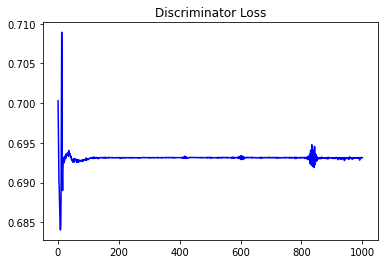

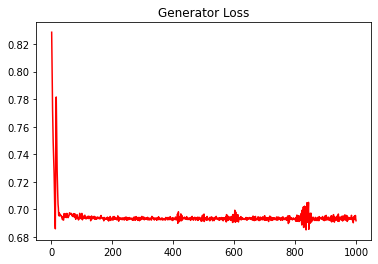

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19911002871191738


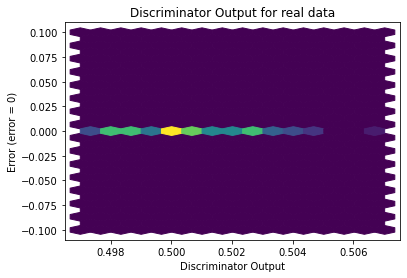

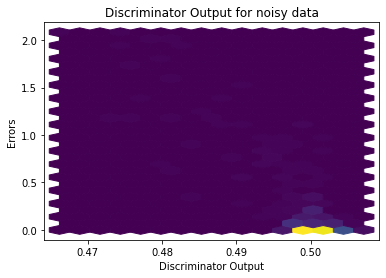

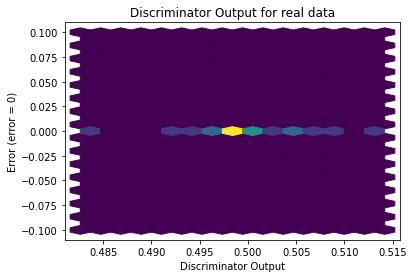

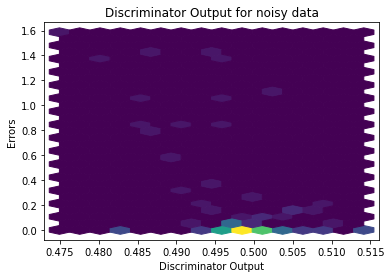

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


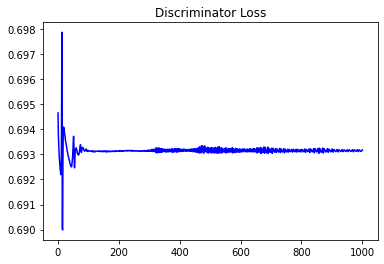

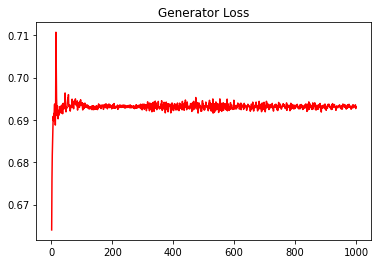

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2664889586270723


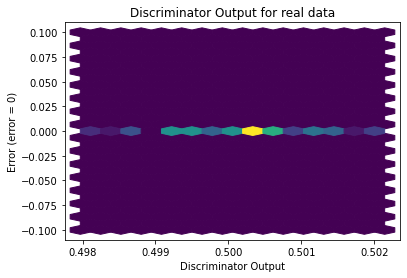

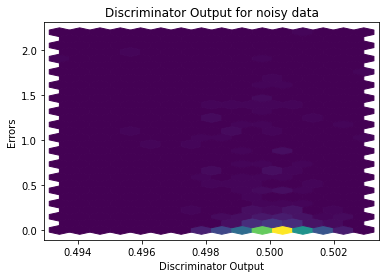

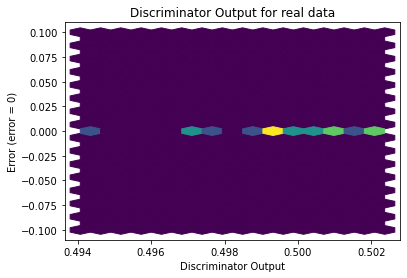

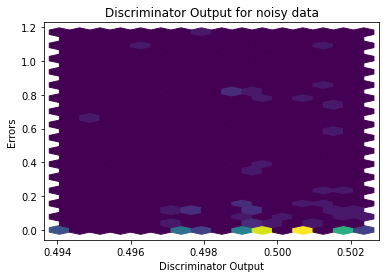

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0397]], requires_grad=True)
